Data Import

In [108]:
import numpy as np
import pandas as pd


path = r'bengaluru_house_prices.csv'
data = pd.read_csv(path)
data.head(20)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [109]:
data.shape

(13320, 9)

In [110]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [111]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Eliminate Junks

In [112]:
#DROP 
data = data.drop(['area_type', 'society','balcony','availability'],axis='columns')

In [113]:
data.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [114]:
#drop na

data2= data.dropna()
data2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [115]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Ouliers Detection and elimination

In [116]:
# lets solve thsi datas create new col BHK and bedroom

data2['bhk']= data2['size'].apply(lambda x : int(x.split(' ')[0])) # this gives you 2 in 2 BHK and so on which will be in strting, to convert to integer we have use int 


C:\Users\ghoas\AppData\Local\Temp\ipykernel_9172\3344545184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['bhk']= data2['size'].apply(lambda x : int(x.split(' ')[0])) # this gives you 2 in 2 BHK and so on which will be in strting, to convert to integer we have use int


In [117]:
data2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [118]:
data2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [119]:
data2[data2.bhk>= 20] #well I think these should be removed as this is unnatural datas

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [120]:
data2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [121]:
#in the table thers is a ranges in total_squart col so fetch it first
#not only ranges but also data like 34.5Sq. Meter , 4125Perch

def isFloat(x):
    try:
        float(x)
    except:
        return False
    else:
        return True


# ~ means neglect
data2[~data2['total_sqft'].apply(isFloat)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [122]:
#logic : if range replace with mean value , if not return as it is , if any other like 25sqft return NONE

def cal_total_sqft(x):
    token = x.split('-')
    if(len(token) == 2):
       return ((float(token[0]) + float(token[1]))/2)
    try:
         return float(x)
    except:
        return None

In [123]:
cal_total_sqft('123')

123.0

In [124]:
cal_total_sqft('2830 - 2882') #return mean value

2856.0

In [125]:
cal_total_sqft('34.5sq. meter') #return nothing basically

In [126]:
data3= data2.copy()
data3['total_sqft']= data3['total_sqft'].apply(cal_total_sqft)
data3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [127]:
data3[~data3['total_sqft'].apply(isFloat)] #nothing left to clean in toal sqrtft
# ~ means to filter the data metion , neglect

,location,size,total_sqft,bath,price,bhk


In [128]:
data3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

Feature Engineering


In [129]:
data4= data3.copy()

In [130]:
#create price per sq ft coloumn

data4['price_sqft']= data4['price']*100000/data4.total_sqft
data4.head()

,location,size,total_sqft,bath,price,bhk,price_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [131]:
#lets explre location columns

len(data4.location.unique())

1302

In [132]:
name= "Anish Gho Shrestha     "
name.strip()

'Anish Gho Shrestha'

In [133]:
name=" Devarachikkanahalli"
name.strip()

'Devarachikkanahalli'

In [134]:
data4[data4.location == ' Devarachikkanahalli']

,location,size,total_sqft,bath,price,bhk,price_sqft
152,Devarachikkanahalli,3 BHK,1250.0,2.0,44.0,3,3520.000000
341,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2474,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
5030,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
5536,Devarachikkanahalli,3 Bedroom,1200.0,3.0,160.0,3,13333.333333
5771,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
6591,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699
7536,Devarachikkanahalli,2 BHK,1130.0,2.0,36.0,2,3185.840708
7767,Devarachikkanahalli,3 BHK,1417.0,2.0,76.0,3,5363.443896
8268,Devarachikkanahalli,2 BHK,1230.0,2.0,58.0,2,4715.447154


In [135]:
#reduce the dimentions

#figure out how many datapoints are availble for location

#t know if there is any space in the end of the location and manage it 
data4.location= data4.location.apply(lambda x : x.strip())
location_stats = data4['location'].value_counts(ascending=False)
location_stats

location
Whitefield                539
Sarjapur  Road            392
Electronic City           304
Kanakpura Road            266
Thanisandra               236
                         ... 
Ramanagara Channapatna      1
Maheswari Nagar             1
Hsr layout sector3          1
Thyagraj Nagar              1
Banagirinagar               1
Name: count, Length: 1291, dtype: int64

In [136]:
data4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [137]:
data4[data4.location == ' Devarachikkanahalli']

,location,size,total_sqft,bath,price,bhk,price_sqft


In [138]:
#know how many location stat samller than 10

len(location_stats[location_stats <=10])
loc_small_10 = location_stats[location_stats <=10]
loc_small_10


location
BTM 1st Stage             10
Gunjur Palya              10
Nagadevanahalli           10
Nagappa Reddy Layout      10
Dodsworth Layout          10
                          ..
Ramanagara Channapatna     1
Maheswari Nagar            1
Hsr layout sector3         1
Thyagraj Nagar             1
Banagirinagar              1
Name: count, Length: 1050, dtype: int64

In [139]:
len(data4.location.unique())

1291

In [140]:
#replacing he locatiionless than 10 as others 

data4['location'] = data4.location.apply(lambda x: 'other' if x in loc_small_10 else x)
data4.head(5)
len(data4.location.unique())

242

In [141]:
len(data4.location.unique())

242

Outliers Detection and removal


In [142]:
#represents the extreme varience that should be removed
#use standard deviation or use simple domain knowledge

#ask manager what is the typical sqft for a bedroom
#lets say we have 600sqft home and total number of bedroom is 6
# then 
# 600/6 = 100sqft/room is the typical bedrrom size
#but he says 300 sqft/romm is rthe threshold so this data seems off. either we can ignore or remove it



In [143]:
data4[(data4.total_sqft /data4.bhk) <300] #these are data errror or outliers or anomoly

,location,size,total_sqft,bath,price,bhk,price_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [144]:
data4[data4.bhk ==1]

,location,size,total_sqft,bath,price,bhk,price_sqft
20,Kengeri,1 BHK,600.0,1.0,15.00,1,2500.000000
24,Thanisandra,1 RK,510.0,1.0,25.25,1,4950.980392
42,other,1 BHK,600.0,1.0,38.00,1,6333.333333
43,Yelahanka,1 Bedroom,660.0,1.0,48.00,1,7272.727273
171,Attibele,1 BHK,450.0,1.0,11.00,1,2444.444444
...,...,...,...,...,...,...,...
13258,Whitefield,1 BHK,877.0,1.0,59.00,1,6727.480046
13273,Raja Rajeshwari Nagar,1 BHK,510.0,1.0,22.00,1,4313.725490
13291,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
13305,Hulimavu,1 BHK,500.0,1.0,220.00,1,44000.000000


In [145]:
data4.shape

(13246, 7)

In [146]:
#remove the data smaaller then 300sqft/bhk
data5=data4.copy()
data5 = data4[~(data4.total_sqft / data4.bhk < 300)]
data5.shape

(12502, 7)

In [147]:
#means 
data5.price_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_sqft, dtype: float64

In [148]:
#min
2.678298e+03

2678.298

In [149]:
#max 
1.764706e+06

1764706.0

In [150]:
#min is 2678 and max is 176... 
#writing a funct that can remove the extreme cases based on standard deviation  =sqrt of vairence
#if a dataset has normal distriibution then most of the datapints (around 68%) should lie betwwen mean an one std deviation
#filter out which is beyong 1 std devaitions

In [151]:
data5.groupby('location').agg('count')

,size,total_sqft,bath,price,bhk,price_sqft
location,,,,,,
1st Block Jayanagar,10,10,10,10,10,10
1st Phase JP Nagar,24,23,24,24,24,23
2nd Phase Judicial Layout,11,11,11,11,11,11
2nd Stage Nagarbhavi,9,9,9,9,9,9
5th Block Hbr Layout,7,7,7,7,7,7
...,...,...,...,...,...,...
Yelahanka,205,205,205,205,205,205
Yelahanka New Town,39,38,39,39,39,38
Yelenahalli,13,13,13,13,13,13


In [152]:
data5.shape

(12502, 7)

In [153]:
#this should be inrespect to price per sqft/bhk because every data have different price/ bhk value

#taking dataframe as input , groupiong by location and calculating the mean and std and filterind dataponts beyond st. Everything above m-st and below m+st keep it , Other filtered out
#remianing all are the outliers 

def remove_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        print(subdf)
        m= np.mean(subdf.price_sqft)
        st = np.std(subdf.price_sqft)
        reduced_df = subdf[(subdf.price_sqft > (m-st)) & (subdf.price_sqft <= (m+st))]
        df_out= pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [154]:
data6= remove_outliers(data5)
data6.shape

                  location       size  total_sqft  bath  price  bhk  \
210    1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4   
848    1st Block Jayanagar      3 BHK      1630.0   3.0  194.0    3   
2152   1st Block Jayanagar      3 BHK      1875.0   2.0  235.0    3   
2355   1st Block Jayanagar  4 Bedroom      2400.0   4.0  450.0    4   
4991   1st Block Jayanagar      2 BHK      1000.0   3.0   60.0    2   
7138   1st Block Jayanagar      3 BHK      1200.0   2.0  130.0    3   
7358   1st Block Jayanagar      2 BHK      1235.0   2.0  148.0    2   
7383   1st Block Jayanagar      4 BHK      2750.0   4.0  413.0    4   
8507   1st Block Jayanagar      3 BHK      1760.0   3.0  115.0    3   
10972  1st Block Jayanagar      4 BHK      2450.0   4.0  368.0    4   

         price_sqft  
210    15017.543860  
848    11901.840491  
2152   12533.333333  
2355   18750.000000  
4991    6000.000000  
7138   10833.333333  
7358   11983.805668  
7383   15018.181818  
8507    6534.090909 

(10242, 7)

Comapring property prices of same location , Found out with different price rnges

In [155]:
data.loc[8116]

location      Rajaji Nagar
size                 3 BHK
total_sqft            1210
bath                   2.0
price                 81.0
Name: 8116, dtype: object

In [156]:
data.loc[9089]

location      Rajaji Nagar
size                 2 BHK
total_sqft            1268
bath                   2.0
price                127.0
Name: 9089, dtype: object

In [157]:
# price variation between the room in same area_type is huge with similar datasets .
#lets get more about it using sctater plot

In [158]:
from matplotlib import pyplot as plt

import matplotlib 

#drawing scatter plot in which it draws 2 Bhk and 3 bhk 
def scat_w_location(df,location):
    # bhk1 = df[(df.location == location) & (df.bhk == 1)]
    bhk2= df[(df.location== location) & (df.bhk == 2)]
    bhk3= df[(df.location  == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize']= (15,10)
    # plt.scatter(bhk1.total_sqft, bhk1.price,
    #             color='red', label='1 BHK',  s=50)

    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label= '2 BHK' ,  s= 50)
    plt.scatter(bhk3.total_sqft, bhk3.price,
                color='green', label='3 BHK',  s=50)
    plt.xlabel('Total Squart Ft')
    plt.ylabel('Price Sqt Ft')
    plt.title(location)
    plt.legend()

In [159]:
len(data5[data5.location == "Rajaji Nagar"])

100

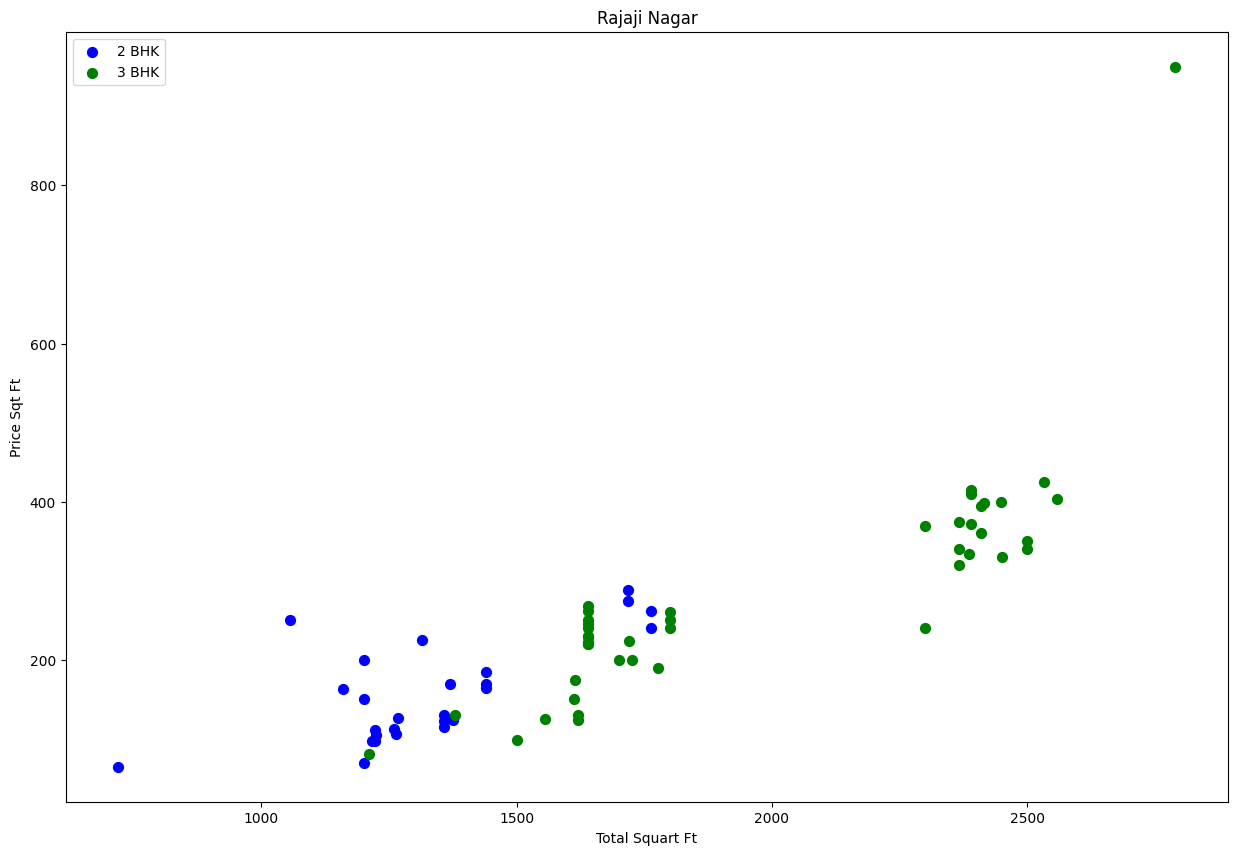

In [160]:
#WITH OUTLIERS
scat_w_location(data5, "Rajaji Nagar")

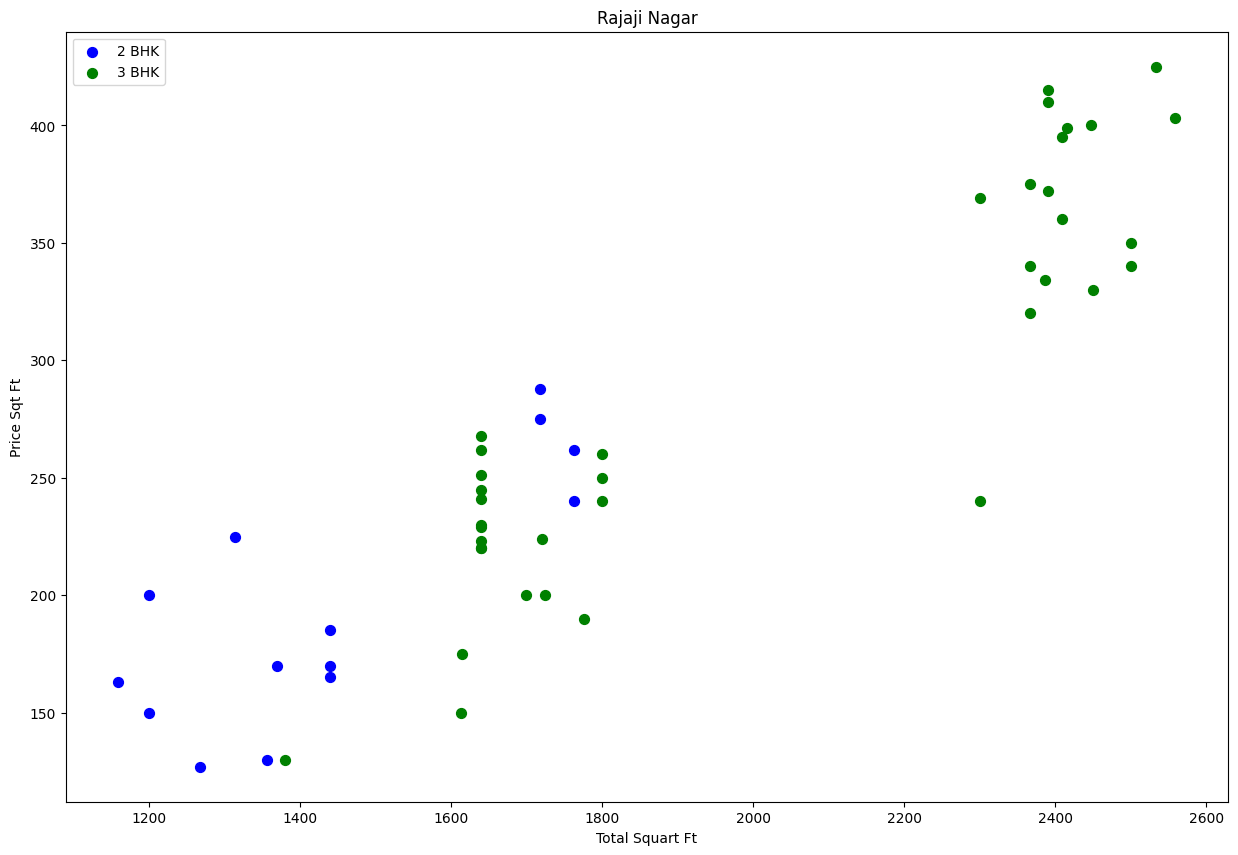

In [161]:
#WITH NO OUTLIERS


# itis drawing scatter plot on 2Bhk and 3bhk

scat_w_location(data6, "Rajaji Nagar")  # can tryu with "Hebbal"

In [162]:
#clearly here in 1800 sqft the 2Bhk and 3bhk are having same amoun t of price ranges while it should be higher in number.
#so we can clearly remove these as the outliers 

#data cleaning in tis area
#function to create a stat for bedroom.
#create a disctionary like 

# We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). 
# What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

# {
#     '1' : {
#         'mean': 4000,
#         'std: 2000,
#         'count': 34
#     },
#     '2' : {
#         'mean': 4300,
#         'std: 2300,
#         'count': 22
#     },    
# }
# Now we can remove those 2 BHK apartments whose price_sqft is less than mean price_sqft of 1 BHK apartment

In [163]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    #create new dataframe based on location first
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        #every new dataframe on every individual location based on bhk
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_sqft),
                'std': np.std(bhk_df.price_sqft),
                'count': bhk_df.shape[0]
            }

            print(bhk_stats[bhk], bhk , location_df)

        #every new dataframe on every individual location based on bhk cehck if the 2hk and 3 are close where mean difference of 3 is less cpomparitely. Exclude it
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            print(stats,bhk)

            if stats and stats['count'] > 5:
                print("yes")
                exclude_indices = np.append(
                    exclude_indices, bhk_df[bhk_df.price_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')


data7 = remove_bhk_outliers(data6)
# data7 = data6.copy()
data7.shape

{'mean': np.float64(11983.805668016194), 'std': np.float64(0.0), 'count': 1} 2               location   size  total_sqft  bath  price  bhk    price_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4  15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3  11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3  12533.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3  10833.333333
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2  11983.805668
5  1st Block Jayanagar  4 BHK      2750.0   4.0  413.0    4  15018.181818
6  1st Block Jayanagar  4 BHK      2450.0   4.0  368.0    4  15020.408163
{'mean': np.float64(11756.16905248807), 'std': np.float64(701.6243657657865), 'count': 3} 3               location   size  total_sqft  bath  price  bhk    price_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4  15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3  11901.840491
2  1st Block Ja

(7331, 7)

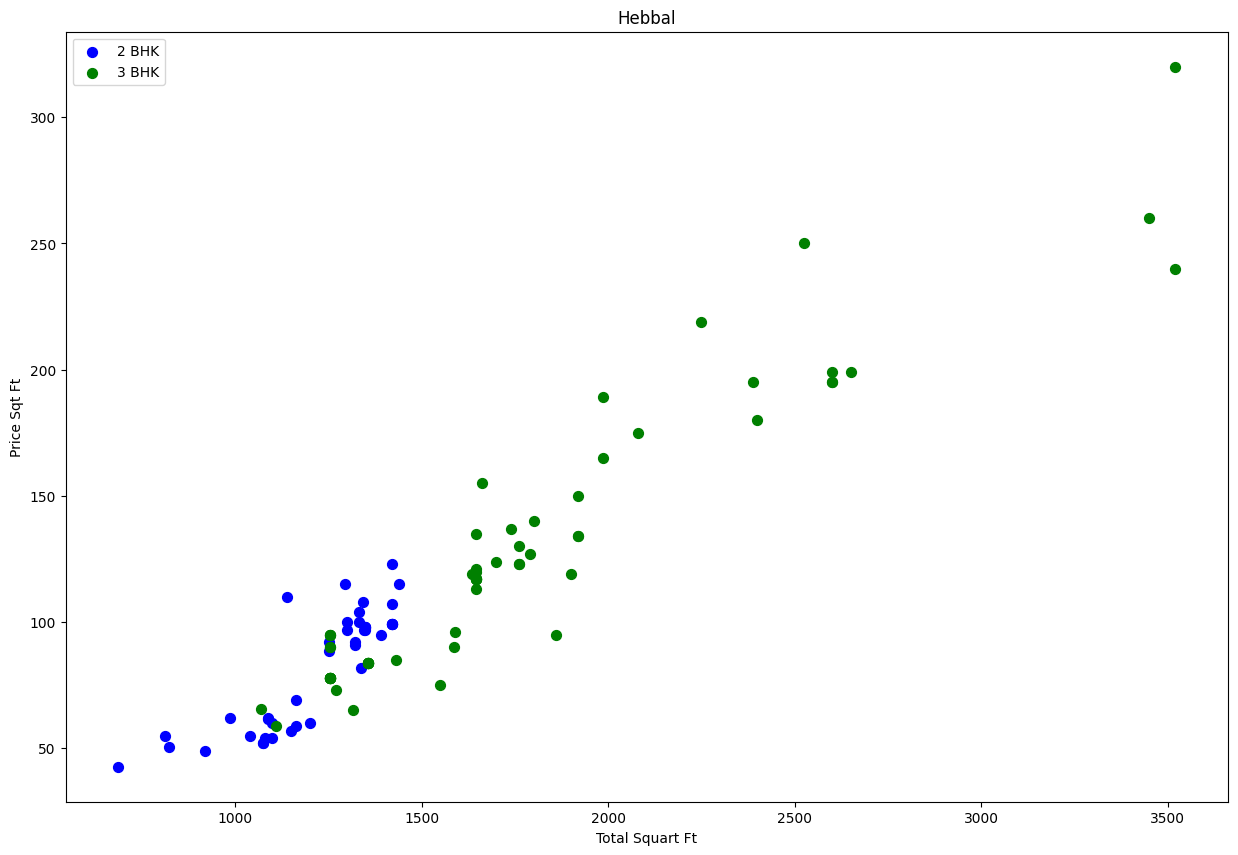

In [164]:
scat_w_location(data6, "Hebbal") 

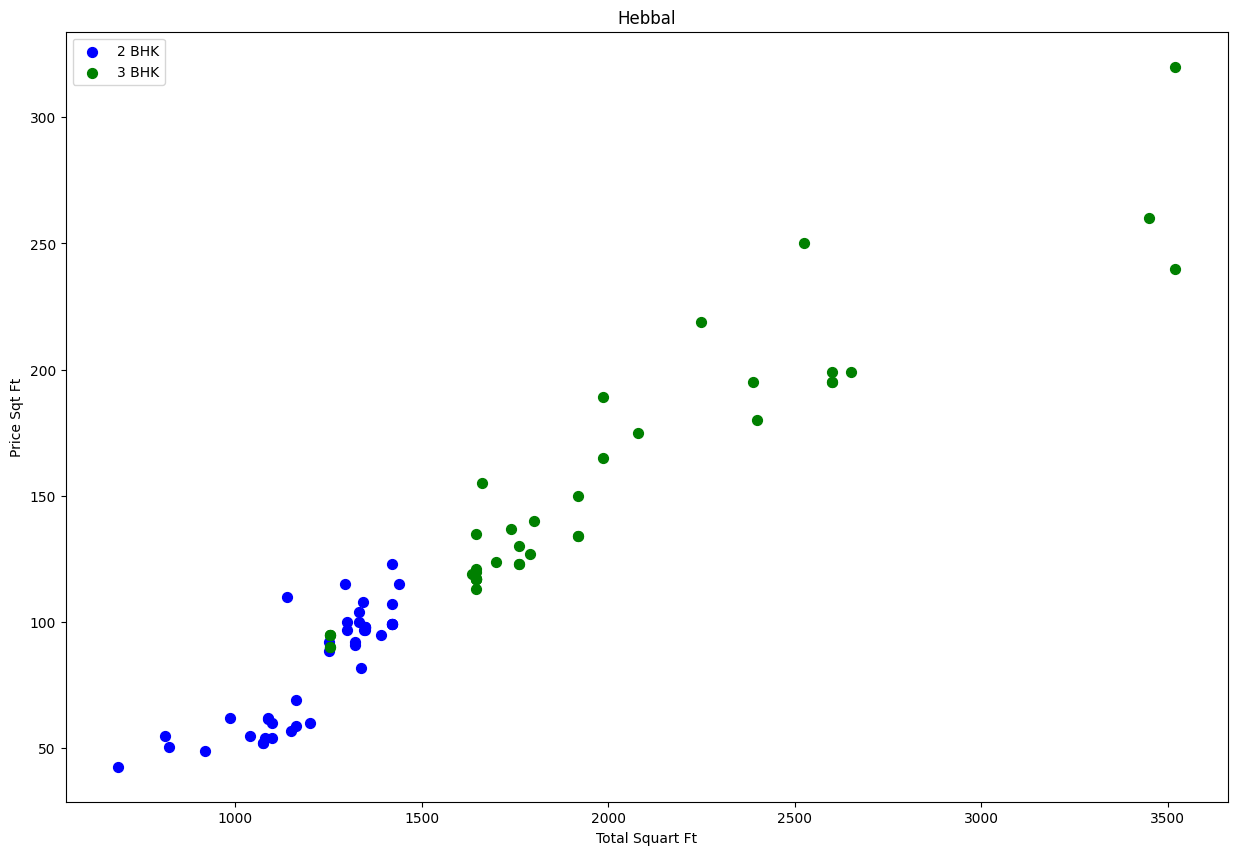

In [165]:
#still some abnormality there but its impossible to remove it and we keep it as it is
scat_w_location(data7, "Hebbal")  # can tryu with "Hebbal"

In [166]:
data7.price_sqft

0        15017.543860
1        11901.840491
2        12533.333333
3        10833.333333
4        11983.805668
             ...     
10233     5833.333333
10234    11111.111111
10237     8130.081301
10238     3201.970443
10241    11111.111111
Name: price_sqft, Length: 7331, dtype: float64

More on Property Prices

Text(0, 0.5, 'Count')

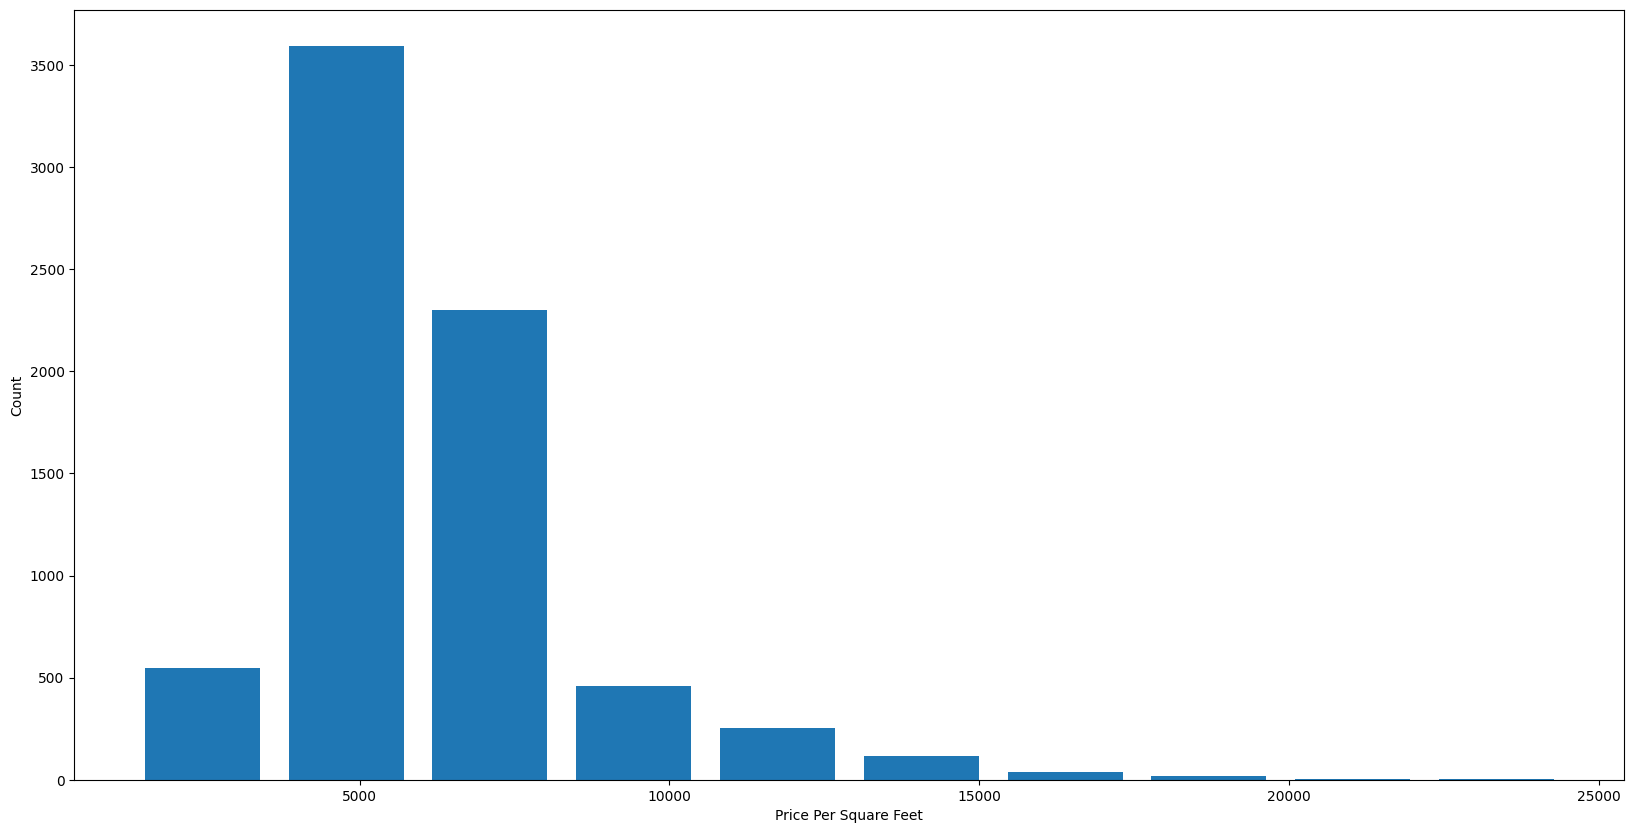

In [167]:
#representation in histogram

#how many apartment there is in per square feet area
#xlabel shows number of datapoints on that sqare area

matplotlib.rcParams['figure.figsize']= (20,10)
plt.hist(data7.price_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Analysis based on bathroom

In [168]:
data7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [169]:
#filter out more than 10

data7[data7.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8489,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8578,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9310,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9641,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [170]:
#how further criteas wil be any time number of bathrrom greater than number of kitchen then its the outlier
#say 2 bedroom apartment and 4 bathroom is not normal

Text(0, 0.5, 'Count')

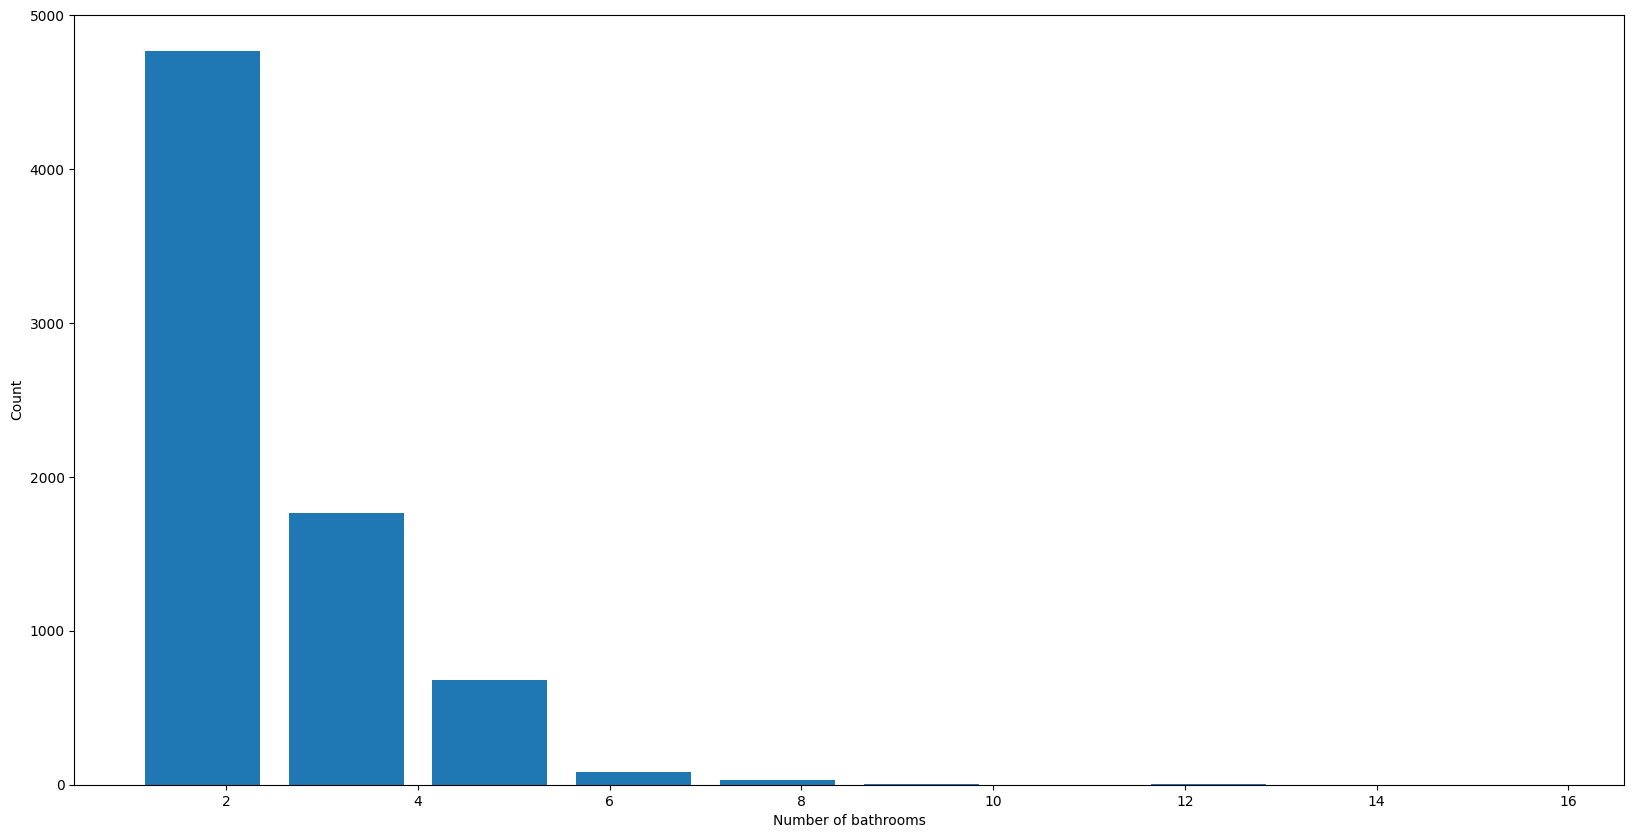

In [171]:
#lets check in the histogram

plt.hist(data7.bath,rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

#says frequency of 2 bathrom is more in the datasets

In [172]:
#lets remove the bathroom that is greater than 2 than the bhk

bath_outlier = data7[data7.bath > data7.bhk+2]
bath_outlier

,location,size,total_sqft,bath,price,bhk,price_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8414,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [173]:
data7.shape

(7331, 7)

In [174]:
#remove bedroom outlier

data8 = data7[~(data7.bath > data7.bhk+2)]
data8.shape

(7327, 7)

This is the end to clear the outlier of the dataset and lets train the dataset

In [175]:
data8.head(10)

,location,size,total_sqft,bath,price,bhk,price_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667
10,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,10169.491525


lets convert the location to dummy , one hot encoding

In [176]:
loc_dummy= pd.get_dummies(data8.location,drop_first=True)
concat = pd.concat([data8,loc_dummy],axis='columns')
data9= concat.drop(['location', 'other', 'size', 'price_sqft'], axis='columns')
data9.head()



,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [177]:
# download = data9.to_csv('downlaod.csv')

In [178]:
data9.shape

(7327, 244)

Declaration of variables


In [179]:
X = data9.drop(['price'],axis='columns')
y= data9.price

In [180]:
X.head()

,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [181]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [182]:
from sklearn.model_selection import train_test_split

X_train,X_test ,y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=42)

In [183]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()

In [184]:
lr.fit(X_train,y_train)

LinearRegression()

In [185]:
lr.score(X_test,y_test)
#83% accuracy is pretty decent

0.8480606447376573

In [186]:
#letsuse kFold now

from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 3, test_size=0.2 , random_state= 42)
score_LR= cross_val_score(LinearRegression(),X,y,cv=cv)

In [187]:
print('Mean of cross val using Linearregression {}'.format(score_LR.mean()))

Mean of cross val using Linearregression 0.8499246742142379


GRID SERACH TO CHECK SCORE OF MANY MODEL

In [188]:
#lets check with grid search cv

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from  sklearn.linear_model import Lasso
model_params = {

    'lasso':{
        'model':Lasso(),
        'params':{
            'alpha':[1,2],
            'selection':['random','cyclic']
        }
    },
    'decison tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion': ['poisson', 'friedman_mse'],
            'splitter':['best','random']
        }

    }
}

In [189]:
scores = [] 
cv=ShuffleSplit(n_splits= 5, test_size = 0.2, random_state = 0 )
for model_name,md in model_params.items():
    gs=GridSearchCV(md['model'],md['params'],cv=cv, return_train_score= False)
    gs.fit(X,y)
    scores.append({
        'model':model_name,
        'best_score':gs.best_score_,
        'best_params':gs.best_params_
    })

data10 = pd.DataFrame(scores)

In [190]:
data10

,model,best_score,best_params
0,lasso,0.685674,"{'alpha': 2, 'selection': 'cyclic'}"
1,decison tree,0.703608,"{'criterion': 'poisson', 'splitter': 'best'}"


In [191]:
#best model is the linear regression

Prediction

In [192]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0] #this is to locate the actual location in the column of the data table in 2D


    x = np.zeros(len(X.columns)) #create a n numbers of index as per the number of the columns in the datatable set all to 0 default
    # total_sqft	bath	price	bhk loc1 loc2 loc3 .........so on

    #chnagin the index values according to the input from the user
    x[0] = sqft
    x[1] = bath
    x[2] = bhk

    #this will;  change the indesx of given loc to 1 remaining are 0 as defaults
    if loc_index >= 0:
        x[loc_index] = 1


#the col shape of the x will be 260 where the index of location part is 1 of given location and  remaining are 0's  
    return lr.predict([x])[0]

In [193]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [194]:
np.where(X.columns == '2nd Phase Judicial Layout')[0][0]

np.int64(4)

In [195]:
# 1250.0	2.0	40.0	2	True
predict_price("Devarachikkanahalli", 1250,2,2)

np.float64(58.74685997267743)

In [196]:
import warnings
warnings.filterwarnings(
    "ignore", message="X does not have valid feature names")

In [197]:
lr.score(X_train,y_train)

0.8502747396060049

In [198]:
# 3 BHK	1350	2	47.25	3	3500	FALSE	FALSE	FALSE	FALSE	FALSE	FALSE	FALSE	FALSE	TRUE 2nd Phase Judicial Layout

predict_price("2nd Phase Judicial Layout", 1350, 2, 3)

#got 43 when needed 47

np.float64(52.21480833375703)

In [199]:
# Chandapura	2 BHK	778	2	25.29	2

predict_price("Chandapura", 778, 2, 2)

np.float64(17.54007221797999)

In [200]:
#  Devarachikkanahalli

# 1250.0	2.0	40.0	2	True	


predict_price('Devarachikkanahalli',1250,2,2)

np.float64(58.74685997267743)

In [201]:
predict_price('1st Phase JP Nagar',1000,2,3)

np.float64(95.23711775480554)

In [202]:
predict_price('1st Phase JP Nagar', 1000, 2,2)

np.float64(96.5315928029013)

In [203]:
predict_price('Indira Nagar',1000,2,2)

np.float64(179.2446333907348)

In [204]:
predict_price('Indira Nagar', 1000,3,3)

np.float64(181.40583519921114)

In [205]:
predict_price("Whitefield", 1000, 3, 2)

np.float64(59.259761723700436)

Export the model to pickle File

In [206]:
import pickle


with open('banglore_home_pricess_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [207]:
#also need the l;ocation with its respective index
import json

location= X.drop(['total_sqft','bath','bhk'],axis='columns')
columns= {
    'data-columns':[col.lower() for col in location.columns]

}

with open('columns.json','w') as f:
    f.write(json.dumps(columns))

In [208]:
X.head()

,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [209]:
data9.bath.min()

np.float64(1.0)

In [210]:


with open('banglore_home_pricess_model.pickle','rb') as f:
    model = pickle.load(f)



In [211]:
def predict_price(location, sqft, bath, bhk):
    # this is to locate the actual location in the column of the data table in 2D
    loc_index = np.where(X.columns == location)[0][0]

    # create a n numbers of index as per the number of the columns in the datatable set all to 0 default
    x = np.zeros(len(X.columns))
    print(x, len(X.columns))
    # total_sqft	bath	price	bhk loc1 loc2 loc3 .........so on

    # chnagin the index values according to the input from the user
    x[0] = sqft
    x[1] = bath
    x[2] = bhk

    # this will;  change the indesx of given loc to 1 remaining are 0 as defaults
    if loc_index >= 0:
        x[loc_index] = 1


# the col shape of the x will be 260 where the index of location part is 1 of given location and  remaining are 0's
    return model.predict([x])[0]

In [212]:
predict_price('Indira Nagar', 1000, 3,3) #predicted using model.pickle

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.] 243


np.float64(181.40583519921114)

In [213]:
predict_price('2nd Phase Judicial Layout', 1000, 3, 3)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.] 243


np.float64(28.295791321340577)

In [214]:
predict_price("Whitefield",1000, 3, 2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.] 243


np.float64(59.259761723700436)